In [1]:
import pandas as pd
file = '/Users/zhihaoyi/Documents/Wholesale customers data.csv'
df = pd.read_csv(file)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Text(0, 0.5, 'Relative Frequency')

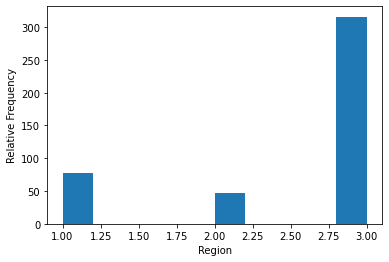

In [3]:
import matplotlib.pyplot as plt
plt.hist(df['Region'])
plt.xlabel('Region')
plt.ylabel('Relative Frequency')

Text(0, 0.5, 'Region')

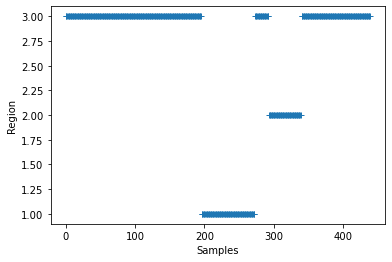

In [4]:
plt.plot(df['Region'],'+')
plt.xlabel('Samples')
plt.ylabel('Region')

In [5]:
region = pd.DataFrame(df['Region'])
count = region.value_counts()
count_df = pd.DataFrame({"Count": count})
count_df

,Count
Region,
3,316
1,77
2,47


In [6]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
y = df['Region']
x = df.drop(columns=['Region'])
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[1.00000000e+00, 1.12940044e-01, 1.30727231e-01, ...,
        3.10630465e-03, 6.54271997e-02, 2.78473091e-02],
       [1.00000000e+00, 6.28990263e-02, 1.32824095e-01, ...,
        2.85484189e-02, 8.05898491e-02, 3.69837297e-02],
       [1.00000000e+00, 5.66216072e-02, 1.19180861e-01, ...,
        3.91164289e-02, 8.60523222e-02, 1.63558615e-01],
       ...,
       [1.00000000e+00, 1.29543104e-01, 2.10135752e-01, ...,
        6.77141542e-03, 3.63462669e-01, 3.88819358e-02],
       [0.00000000e+00, 9.17270036e-02, 2.62244189e-02, ...,
        1.66491355e-02, 4.04174015e-03, 4.42636629e-02],
       [0.00000000e+00, 2.48243393e-02, 2.23710905e-02, ...,
        6.57418973e-04, 1.16108172e-02, 1.02211097e-03]])

In [7]:
# 80% trainning, 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(352, 7) (88, 7) (352,) (88,)


In [49]:
# cross validation
import numpy as np
from sklearn.model_selection import GridSearchCV
fixed_params = {'n_clusters':3}
cv_params = {'max_iter':np.linspace(1,300,100, dtype=int), 'n_init':np.linspace(1,10,5, dtype=int), 'algorithm':['lloyd','elkan','auto','full']}

In [50]:
# Kmeans model
from sklearn.cluster import KMeans
model = KMeans(**fixed_params)
model_cv = GridSearchCV(model, cv_params, verbose = 2, refit=True, cv=5)
model_cv.fit(x_train, y_train)
print(model_cv.best_params_)
print(model_cv.best_score_)
# {'algorithm': 'elkan', 'max_iter': 176, 'n_init': 1}
# -2.353536163951536

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=1; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=1; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=1; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=1; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=1; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=3; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=3; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=3; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=3; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=3; total time=   0.0s
[CV] END ..............algorithm=lloyd, max_iter=1, n_init=5; total time=   0.0s
[CV] END ..............algorithm=lloyd, max

/Users/zhihaoyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2500 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2500 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/zhihaoyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zhihaoyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 1146, in fit
    self._check_params(X)
  File "/Users/zhihaoyi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py", line 956, in _check_params
    raise Va

In [55]:
# accuracy
from sklearn.metrics import accuracy_score
y_pred = model_cv.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc

0.2159090909090909